No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


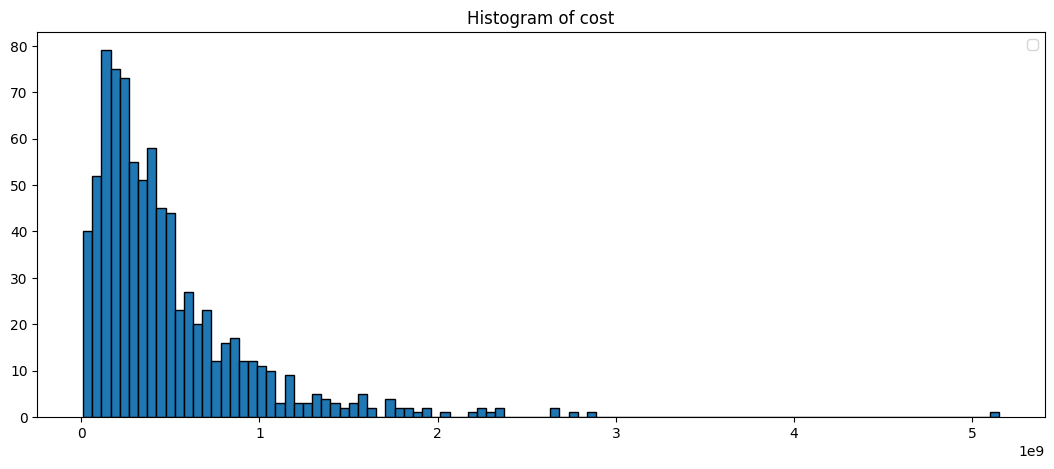

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('县公司购电成本.xlsx')
fig, ax = plt.subplots(1, 1, figsize=(13, 5))
ax.hist(df['指标值（元）'], bins=100, edgecolor='black')
ax.set_title('Histogram of cost')
ax.legend()